In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter
from sklearn.model_selection import train_test_split

In [2]:
df1 = pd.read_csv("datatest.txt")

In [3]:
df2 = pd.read_csv("datatest2.txt")

In [4]:
df3 = pd.read_csv("datatraining.txt")

In [5]:
df = pd.concat([df1,df2,df3])

In [6]:
df_train, df_test = train_test_split(df, test_size=0.2)

In [7]:
df_train.reset_index(inplace=True, drop=True)

In [8]:
dates = pd.to_datetime(df_train['date'], infer_datetime_format=True)
df_train['day'] = dates.dt.day
df_train['hour'] = dates.dt.hour

C:\Users\pasqu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\pasqu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
weekend = []
for i in df_train.day:
    if i == 7 or i == 8:
        weekend.append(1)
    else:
        weekend.append(0)
weekend = pd.Series(weekend)
df_train['weekend'] = weekend

C:\Users\pasqu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
daylight = []
for i in df_train.hour:
    if i >= 7 and i <= 17:
        daylight.append(1)
    else:
        daylight.append(0)
daylight = pd.Series(daylight)
df_train['daylight'] = daylight

C:\Users\pasqu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
df_train.dropna(axis = 0, inplace = True)

C:\Users\pasqu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
df_train.reset_index(drop = True)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,day,hour,weekend,daylight
0,2015-02-09 21:20:00,20.500000,33.790000,0.000000,723.000000,0.005044,0,9,21,0,0
1,2015-02-16 13:21:59,21.500000,28.340000,461.500000,884.500000,0.004495,1,16,13,0,1
2,2015-02-14 21:22:00,20.000000,35.145000,0.000000,532.500000,0.005087,0,14,21,0,0
3,2015-02-07 05:48:00,19.760000,19.290000,0.000000,444.666667,0.002740,0,7,5,1,0
4,2015-02-14 15:07:00,19.890000,36.000000,24.000000,514.000000,0.005176,0,14,15,0,1
5,2015-02-08 12:16:00,19.390000,30.500000,66.666667,428.000000,0.004245,0,8,12,1,1
6,2015-02-12 09:32:00,22.390000,25.125000,552.000000,1142.000000,0.004205,1,12,9,0,1
7,2015-02-05 07:56:00,20.963333,23.463333,413.000000,536.000000,0.003595,1,5,7,0,1
8,2015-02-07 04:38:00,19.790000,19.290000,0.000000,440.000000,0.002746,0,7,4,1,0
9,2015-02-16 04:01:59,20.390000,26.390000,0.000000,856.000000,0.003906,0,16,4,0,0


In [13]:
df_train = df_train[['Temperature', 'Humidity', 'Light', 'CO2', 'Occupancy', 'day', 'hour', 'daylight']]

# Data Preparation

In [14]:
def prepare_dataset(df, class_name):
    df = remove_missing_values(df)
    numeric_columns = get_numeric_columns(df)
    rdf = df.copy(deep=True)
    df, feature_names, class_values = one_hot_encoding(df, class_name)
    real_feature_names = get_real_feature_names(rdf, numeric_columns, class_name)
    rdf = rdf[real_feature_names + (class_values if isinstance(class_name, list) else [class_name])]
    features_map = get_features_map(feature_names, real_feature_names)

    return df, feature_names, class_values, numeric_columns, rdf, real_feature_names, features_map

def remove_missing_values(df):
    for column_name, nbr_missing in df.isna().sum().to_dict().items():
        if nbr_missing > 0:
            if column_name in df._get_numeric_data().columns:
                mean = df[column_name].mean()
                df[column_name].fillna(mean, inplace=True)
            else:
                mode = df[column_name].mode().values[0]
                df[column_name].fillna(mode, inplace=True)
    return df

def get_numeric_columns(df):
    numeric_columns = list(df._get_numeric_data().columns)
    return numeric_columns

def get_real_feature_names(rdf, numeric_columns, class_name):
    real_feature_names = [c for c in rdf.columns if c in numeric_columns and c != class_name]
    real_feature_names += [c for c in rdf.columns if c not in numeric_columns and c != class_name]
    return real_feature_names

def one_hot_encoding(df, class_name):
    dfX = pd.get_dummies(df[[c for c in df.columns if c != class_name]], prefix_sep='=')
    class_name_map = {v: k for k, v in enumerate(sorted(df[class_name].unique()))}
    dfY = df[class_name].map(class_name_map)
    df = pd.concat([dfX, dfY], axis=1, join_axes=[dfX.index])
    feature_names = list(dfX.columns)
    class_values = sorted(class_name_map)
    return df, feature_names, class_values

def get_features_map(feature_names, real_feature_names):
    features_map = defaultdict(dict)
    i = 0
    j = 0

    while i < len(feature_names) and j < len(real_feature_names):
        if feature_names[i] == real_feature_names[j]:
            features_map[j][feature_names[i]] = j
            i += 1
            j += 1
        elif feature_names[i].startswith(real_feature_names[j]):
            features_map[j][feature_names[i]] = j
            i += 1
        else:
            j += 1
    return features_map

In [15]:
class_name = 'Occupancy'

In [16]:
res = prepare_dataset(df_train, class_name)
df_train, feature_names, class_values, numeric_columns, rdf, real_feature_names, features_map = res
df_train.head()

,Temperature,Humidity,Light,CO2,day,hour,daylight,Occupancy
0,20.50,33.790,0.0,723.000000,9,21,0,0
1,21.50,28.340,461.5,884.500000,16,13,1,1
2,20.00,35.145,0.0,532.500000,14,21,0,0
3,19.76,19.290,0.0,444.666667,7,5,0,0
4,19.89,36.000,24.0,514.000000,14,15,1,0


# Data Partitioning

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [18]:
attributes = [col for col in df_train.columns if col != class_name]
X = df_train[attributes].values
y = df_train[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y) 

In [19]:
X_train.shape

(13158, 7)

# Gridsearch

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score

In [21]:
clf = RandomForestClassifier()
model = Pipeline([
        ('clf', clf)
    ])

param_list = {'clf__criterion': ['gini'],#, 'entropy']
  'clf__max_depth': [20],
  'clf__min_samples_leaf': [15],
  'clf__min_samples_split':  [2],
  'clf__n_estimators': [50]
}
scoring = ['f1', 'precision', 'recall', 'accuracy', 'roc_auc']
#30,20,10,100
score_to_maximize = 'f1'

grid_search = GridSearchCV(model, param_grid=param_list, verbose=5, scoring=scoring, return_train_score=True, cv=3, refit=score_to_maximize)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=15, clf__min_samples_split=2, clf__n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=15, clf__min_samples_split=2, clf__n_estimators=50, accuracy=(train=0.990, test=0.989), f1=(train=0.979, test=0.976), precision=(train=0.968, test=0.962), recall=(train=0.991, test=0.990), roc_auc=(train=1.000, test=0.998), total=   0.6s
[CV] clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=15, clf__min_samples_split=2, clf__n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=15, clf__min_samples_split=2, clf__n_estimators=50, accuracy=(train=0.990, test=0.989), f1=(train=0.979, test=0.977), precision=(train=0.966, test=0.963), recall=(train=0.992, test=0.991), roc_auc=(train=0.999, test=0.999), total=   0.5s
[CV] clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=15, clf__min_samples_split=2, clf__n_estimators=50 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV]  clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=15, clf__min_samples_split=2, clf__n_estimators=50, accuracy=(train=0.990, test=0.990), f1=(train=0.978, test=0.980), precision=(train=0.965, test=0.967), recall=(train=0.992, test=0.992), roc_auc=(train=0.999, test=0.999), total=   0.5s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                              

In [22]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_f1'] == i)  #Picks all candidates with rank i
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("F1 score: (Train: {0:.3f}, Val: {1:.3f})".format(results['mean_train_f1'][candidate], results['mean_test_f1'][candidate]))
            print("Accuracy: (Train: {0:.3f}, Val: {1:.3f})".format(results['mean_train_accuracy'][candidate], results['mean_test_accuracy'][candidate]))
            print("Precision: (Train: {0:.3f}, Val: {1:.3f})".format(results['mean_train_precision'][candidate], results['mean_test_precision'][candidate]))
            print("Recall: (Train: {0:.3f}, Val: {1:.3f})".format(results['mean_train_recall'][candidate], results['mean_test_recall'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [23]:
best = grid_search.best_estimator_

In [24]:
grid_search.best_params_

{'clf__criterion': 'gini',
 'clf__max_depth': 20,
 'clf__min_samples_leaf': 15,
 'clf__min_samples_split': 2,
 'clf__n_estimators': 50}

In [25]:
report(grid_search.cv_results_, n_top=5)

Model with rank: 1
F1 score: (Train: 0.979, Val: 0.977)
Accuracy: (Train: 0.990, Val: 0.989)
Precision: (Train: 0.966, Val: 0.964)
Recall: (Train: 0.992, Val: 0.991)
Parameters: {'clf__criterion': 'gini', 'clf__max_depth': 20, 'clf__min_samples_leaf': 15, 'clf__min_samples_split': 2, 'clf__n_estimators': 50}



# Random Tree

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
#usando i parametri ricavati dal gridsearch

clf = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=20, min_samples_split=2, 
                             min_samples_leaf=15, min_weight_fraction_leaf=0.0, max_features='auto', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.990273556231003
F1-score [0.99364827 0.97924773]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2531
           1       0.96      0.99      0.98       759

    accuracy                           0.99      3290
   macro avg       0.98      0.99      0.99      3290
weighted avg       0.99      0.99      0.99      3290



In [29]:
classification_report(y_test, y_pred, output_dict=True)

{'0': {'precision': 0.9984044674910252,
  'recall': 0.98893717898064,
  'f1-score': 0.9936482731242556,
  'support': 2531},
 '1': {'precision': 0.9642401021711366,
  'recall': 0.994729907773386,
  'f1-score': 0.9792477302204929,
  'support': 759},
 'accuracy': 0.990273556231003,
 'macro avg': {'precision': 0.981322284831081,
  'recall': 0.991833543377013,
  'f1-score': 0.9864480016723742,
  'support': 3290},
 'weighted avg': {'precision': 0.9905227795646436,
  'recall': 0.990273556231003,
  'f1-score': 0.9903260810075518,
  'support': 3290}}

In [30]:
import json
json.dumps(classification_report(y_test, y_pred, output_dict=True))

'{"0": {"precision": 0.9984044674910252, "recall": 0.98893717898064, "f1-score": 0.9936482731242556, "support": 2531}, "1": {"precision": 0.9642401021711366, "recall": 0.994729907773386, "f1-score": 0.9792477302204929, "support": 759}, "accuracy": 0.990273556231003, "macro avg": {"precision": 0.981322284831081, "recall": 0.991833543377013, "f1-score": 0.9864480016723742, "support": 3290}, "weighted avg": {"precision": 0.9905227795646436, "recall": 0.990273556231003, "f1-score": 0.9903260810075518, "support": 3290}}'

In [31]:
json.loads(json.dumps(classification_report(y_test, y_pred, output_dict=True)))

{'0': {'precision': 0.9984044674910252,
  'recall': 0.98893717898064,
  'f1-score': 0.9936482731242556,
  'support': 2531},
 '1': {'precision': 0.9642401021711366,
  'recall': 0.994729907773386,
  'f1-score': 0.9792477302204929,
  'support': 759},
 'accuracy': 0.990273556231003,
 'macro avg': {'precision': 0.981322284831081,
  'recall': 0.991833543377013,
  'f1-score': 0.9864480016723742,
  'support': 3290},
 'weighted avg': {'precision': 0.9905227795646436,
  'recall': 0.990273556231003,
  'f1-score': 0.9903260810075518,
  'support': 3290}}

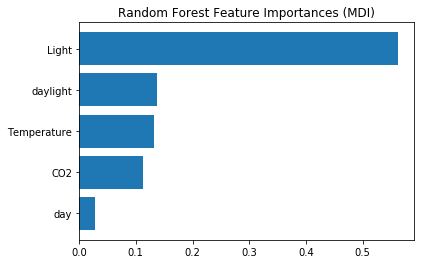

In [32]:
nbr_features = 5

tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(feature_names)[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

In [33]:
import pydotplus
from sklearn import tree
from IPython.display import Image

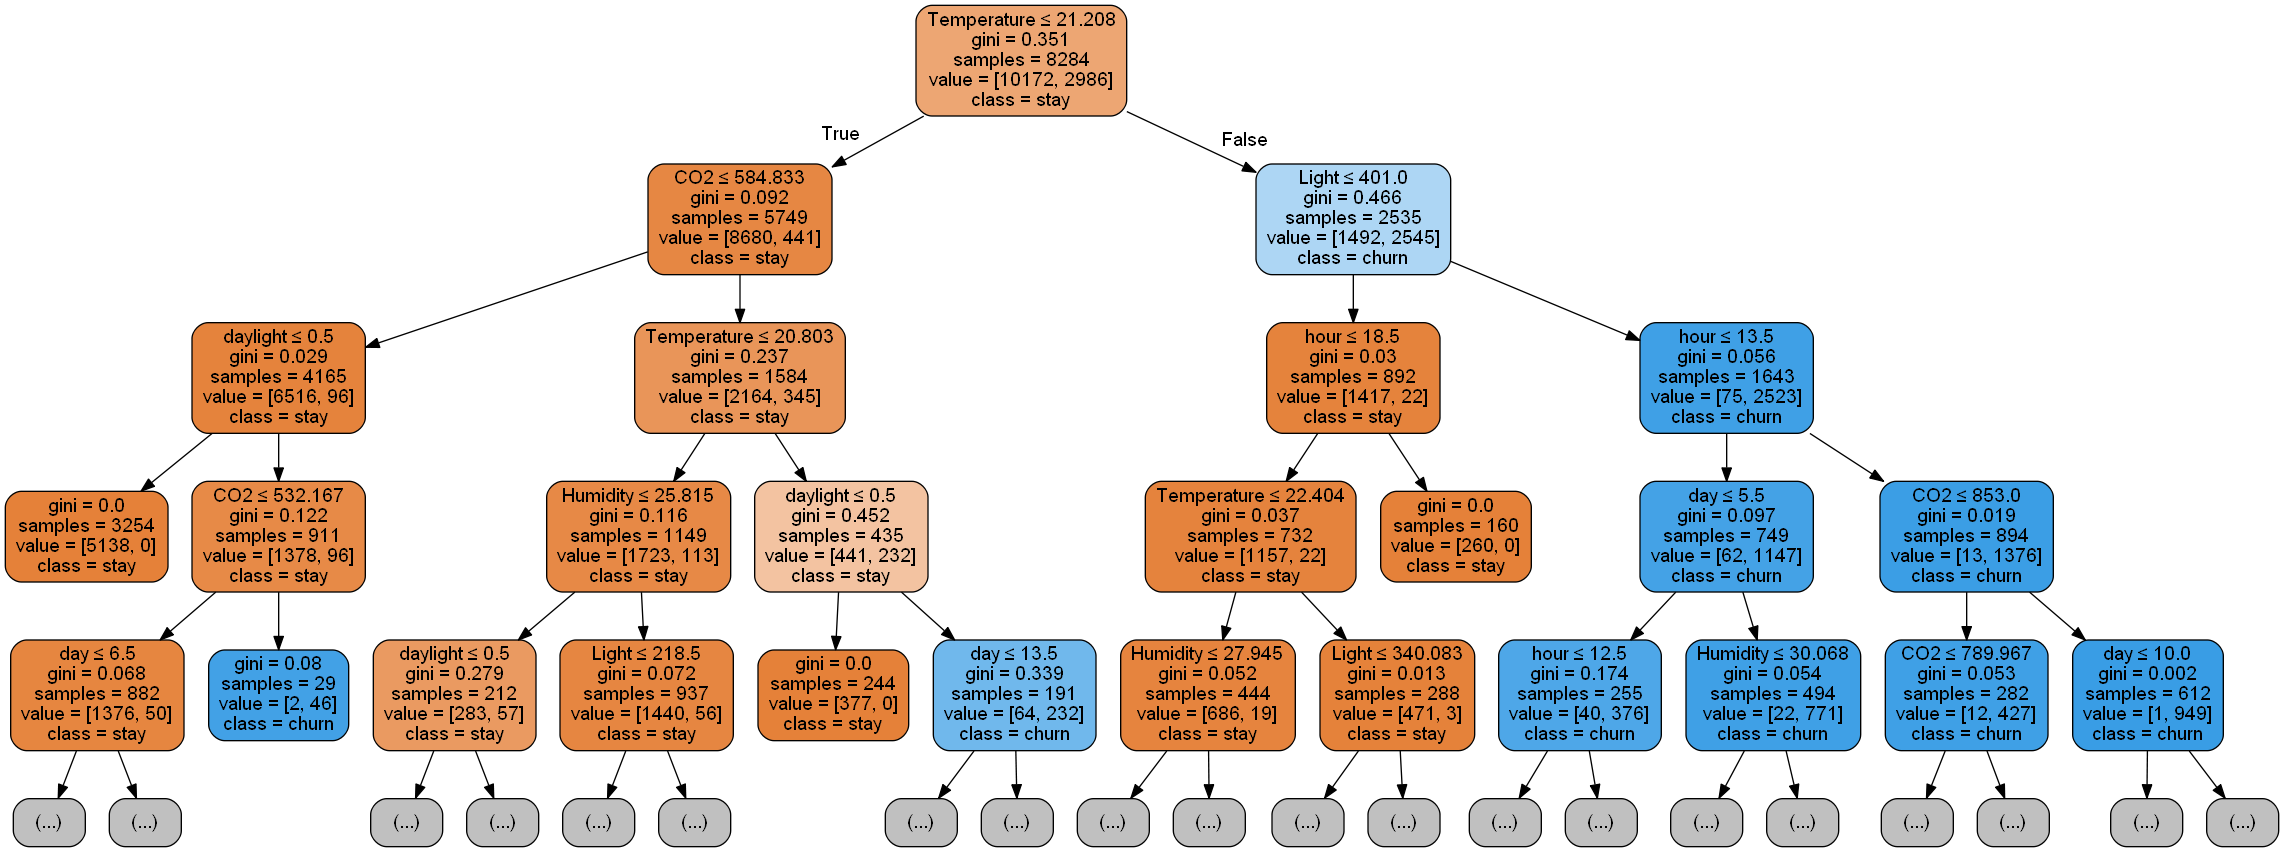

In [34]:
dot_data = tree.export_graphviz(clf.estimators_[0], out_file=None,  
                                feature_names=feature_names, 
                                class_names=['stay', 'churn'],  
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=4)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

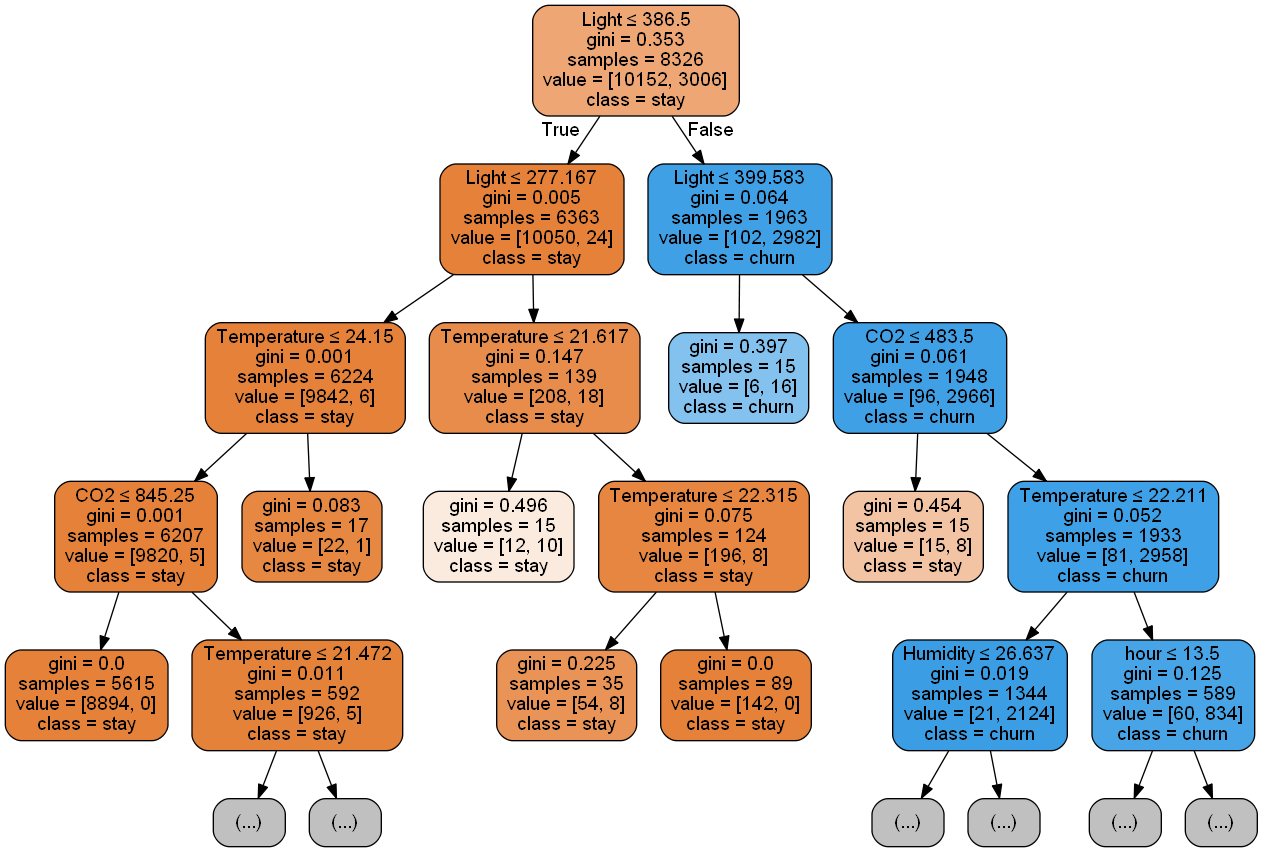

In [35]:
dot_data = tree.export_graphviz(clf.estimators_[1], out_file=None,  
                                feature_names=feature_names, 
                                class_names=['stay', 'churn'],  
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=4)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

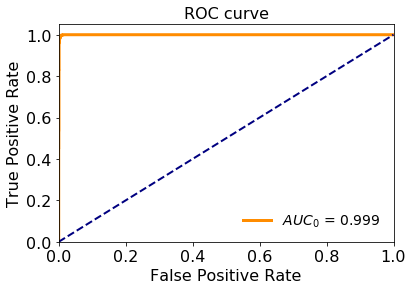

In [46]:
y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

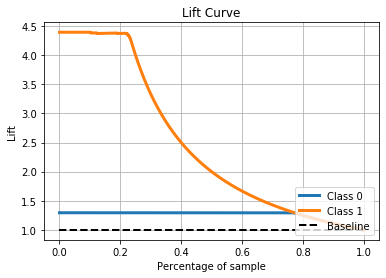

In [48]:
from scikitplot.metrics import plot_lift_curve
plot_lift_curve(y_test, y_score)
plt.show()

## Cross Validation

In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
clf = RandomForestClassifier()
scores = cross_val_score(clf, X, y, cv=5)

print('Accuracy %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Accuracy 0.994 +/- 0.001


## Tuning the hyper-parameters

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [42]:
param_list = {'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 5, 10, 20],
             }

grid_search = GridSearchCV(clf, param_grid=param_list, cv=5)
grid_search.fit(X_train, y_train)
clf = grid_search.best_estimator_

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.993920972644377
F1-score [0.99607073 0.98657718]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2541
           1       0.99      0.98      0.99       749

    accuracy                           0.99      3290
   macro avg       0.99      0.99      0.99      3290
weighted avg       0.99      0.99      0.99      3290



In [43]:
param_list = {'max_depth': [None] + list(np.arange(2, 20)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
             }

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=20, cv=5)
random_search.fit(X_train, y_train)
clf = random_search.best_estimator_


y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.994224924012158
F1-score [0.99625763 0.98735862]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2541
           1       0.98      0.99      0.99       749

    accuracy                           0.99      3290
   macro avg       0.99      0.99      0.99      3290
weighted avg       0.99      0.99      0.99      3290



In [44]:
random_search.cv_results_['params'][random_search.cv_results_['rank_test_score'][0]]

{'min_samples_split': 2, 'min_samples_leaf': 10, 'max_depth': 6}

# Bagging

In [36]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [40]:
#tree classifier non adatto, uso il knn

clf = BaggingClassifier(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='distance'), n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9908814589665653
F1-score [0.99404289 0.98056995]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2531
           1       0.96      1.00      0.98       759

    accuracy                           0.99      3290
   macro avg       0.98      0.99      0.99      3290
weighted avg       0.99      0.99      0.99      3290



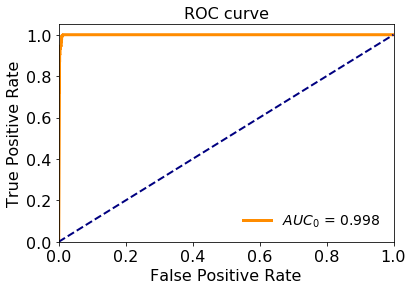

In [41]:
y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

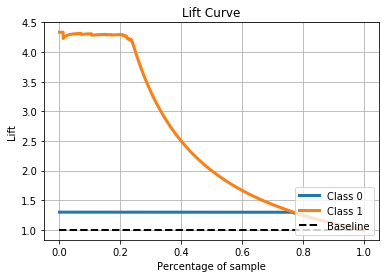

In [42]:
plot_lift_curve(y_test, y_score)
plt.show()

# Boosting

In [47]:
from sklearn.ensemble import AdaBoostClassifier

In [48]:
#The most important thing is that the weak classifiers change a bit when the training set changes.
#Decision trees are good for this, because minor changes in the input data can often result in significant changes to the tree. 
#Nearest neighbor and naive Bayes are not good choices because they change less with changes to the training set changes.

clf = AdaBoostClassifier(base_estimator=None, n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.990273556231003
F1-score [0.99364323 0.97930142]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2531
           1       0.96      1.00      0.98       759

    accuracy                           0.99      3290
   macro avg       0.98      0.99      0.99      3290
weighted avg       0.99      0.99      0.99      3290



In [49]:
#qui uso il randomforest come base estimator, risultati migliori

clf = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=20, min_samples_split=2, min_samples_leaf=15, min_weight_fraction_leaf=0.0, max_features='auto', random_state=0), n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9933130699088146
F1-score [0.99564701 0.98558322]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2531
           1       0.98      0.99      0.99       759

    accuracy                           0.99      3290
   macro avg       0.99      0.99      0.99      3290
weighted avg       0.99      0.99      0.99      3290



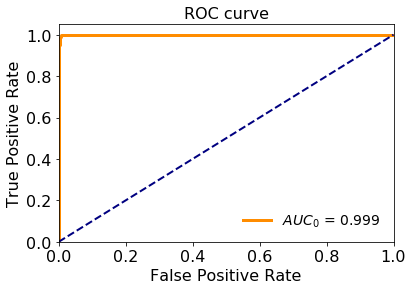

In [50]:
y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

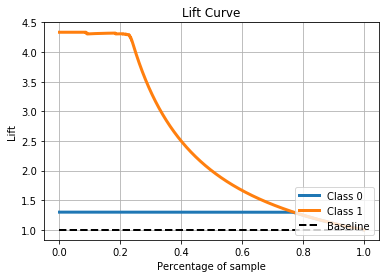

In [51]:
plot_lift_curve(y_test, y_score)
plt.show()